#Resumo

- O desafio proposto trata sobre o transtorno depressivo, um problema multifatorial que pode ter várias possíveis combinações de situações como causa.

- Os dados disponíveis são resultados da NHNES (National Health and Nutrition Examination Survey), realizada anualmente nos EUA para avaliar a saúde e nutrição de adultos e crianças;

- Seu desafio é responder as seguintes perguntas:

  - Qual o perfil de indivíduos (adultos maiores de 18 anos) com sintomas depressivos nos EUA no período de 2005-2006?

  - Hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão nesta população?



In [194]:
import pandas as pd
import numpy as np

demo_phq = pd.read_csv('/content/DEMO_PHQ.csv')
pag_hei = pd.read_csv('/content/PAG_HEI.csv')

demo_phq.head()


,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


In [87]:
pag_hei.head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


In [195]:
reserv = demo_phq['INDFMINC']
demo_phq.drop(['INDFMINC'], axis = 1, inplace = True)
#transformando os valores 7 e 9 que indicam que a pessoa nao quis responder ou nao sabia para nulos
demo_phq = demo_phq.replace(7.0, np.nan)
demo_phq = demo_phq.replace(9.0,np.nan)
reserv = reserv.replace (77, np.nan)
reserv = reserv.replace (99, np.nan)



In [196]:
demo_phq = demo_phq.join(reserv,how = 'inner')


In [197]:
df = demo_phq.set_index('SEQN').join(pag_hei.set_index('SEQN'), how='inner')

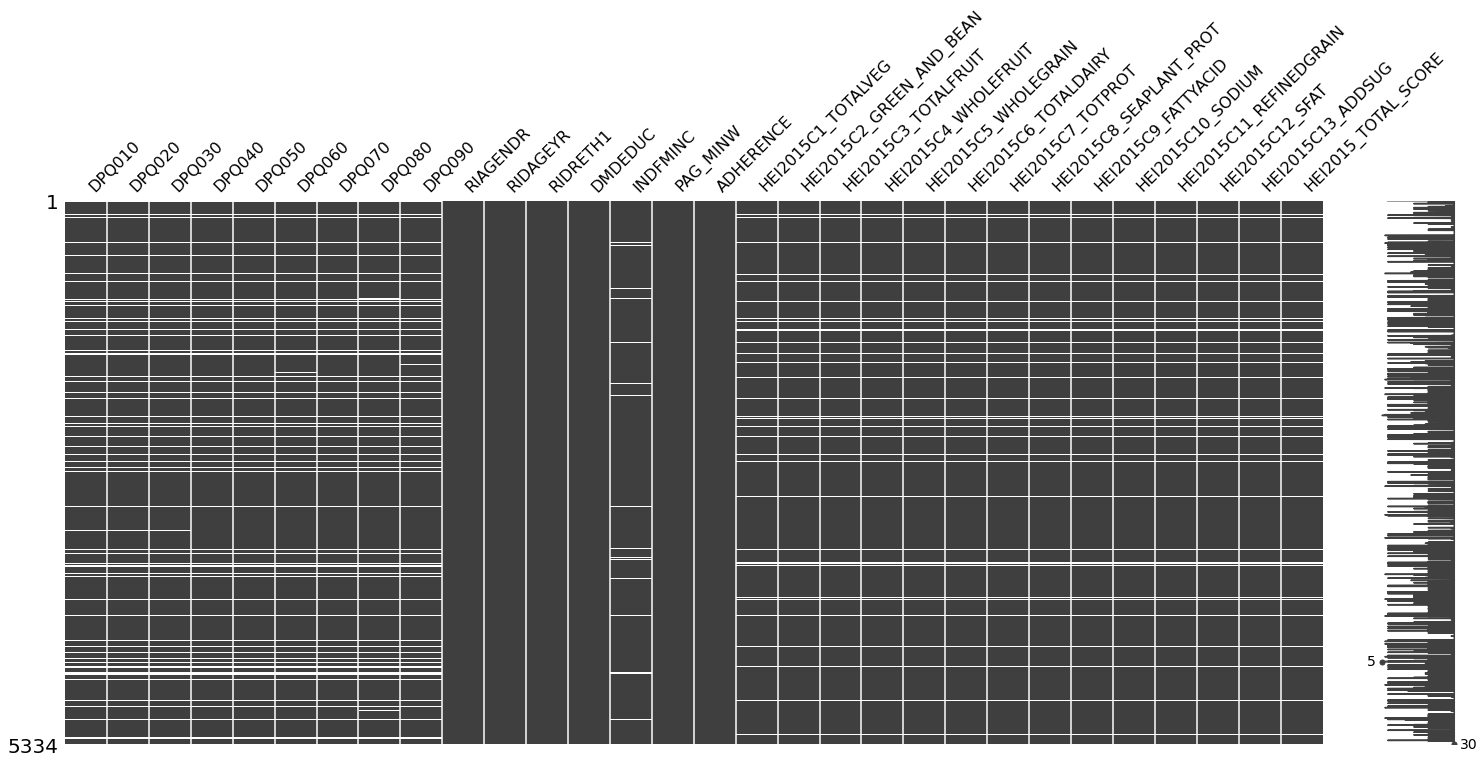

In [107]:
import missingno as msno
msno.matrix(df)

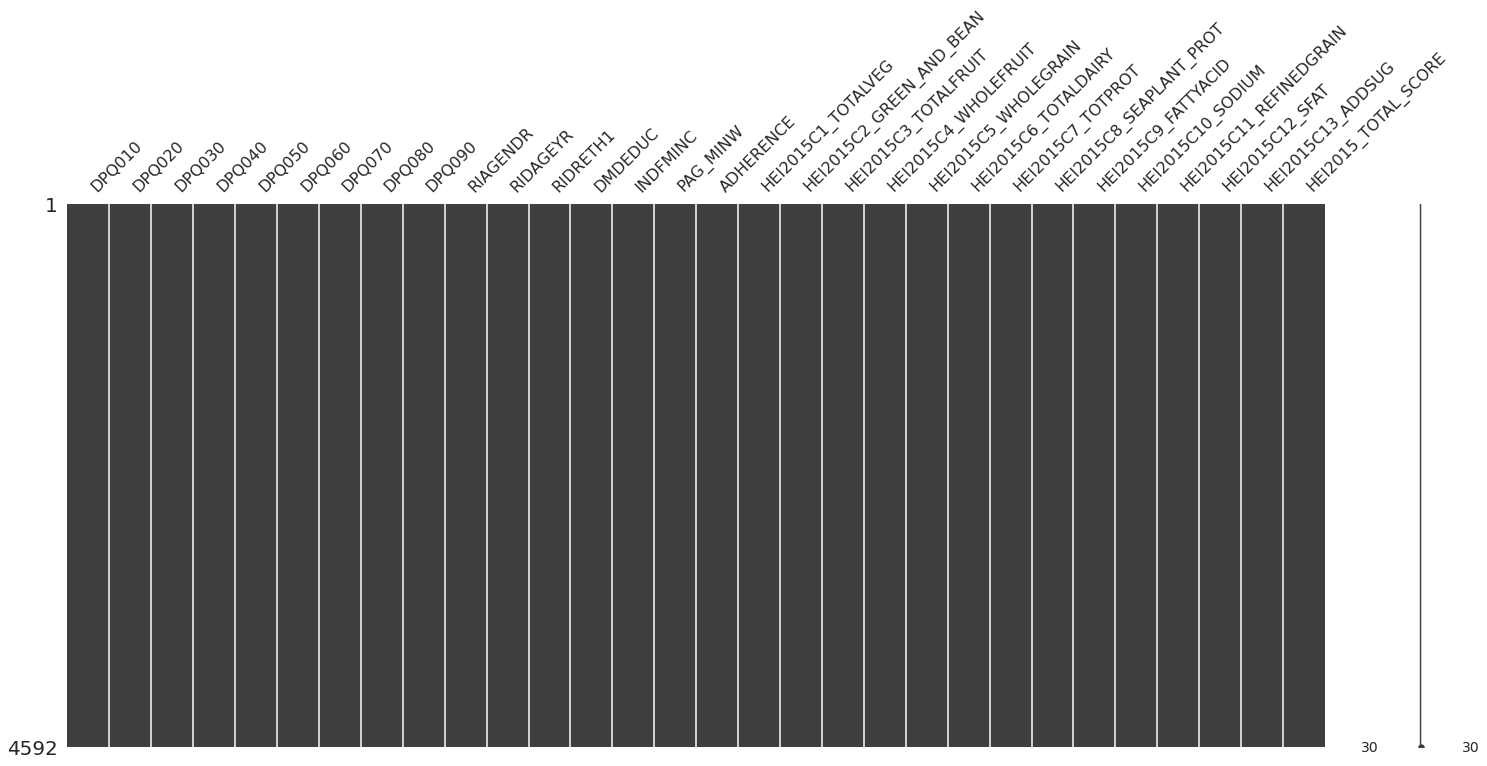

In [198]:
df = df.dropna()
msno.matrix(df)

In [199]:
#def somar(*args):
#  return sum(args)
#df['phq9'] = df['phq9'].apply(somar, args =df['DPQ010','DPQ020','DPQ030','DPQ040','DPQ050','DPQ060','DPQ070','DPQ080','DPQ090'])

df['phq9'] = df['DPQ010']+ df['DPQ020']+df['DPQ030']+ df['DPQ040'] +df['DPQ050']+df['DPQ060']+df['DPQ070']+df['DPQ080']+df['DPQ090']


### criar variavel phq_grp com a classificação do escore phq9

- 0 (sem sintoma)
- 1 (sintomas leves)
- 2 (sintomas moderados)
- 3 (sintomas moderadamente severos)
- 4 (sintomas severos)

In [200]:
condicoes = [(df['phq9'] < 5), 
             (df['phq9'] >= 5) & (df['phq9'] < 10), 
             (df['phq9'] >=10) & (df['phq9'] <15),
             (df['phq9'] >=15) & (df['phq9'] <19),
             (df['phq9'] >= 20)]

opcoes = [0, 1, 2, 3,4]
df['phq_grp'] = np.select(condicoes, opcoes)

# ANÁLISE EXPLORATÓRIA (EDA) UNIVARIADA

## Identificando os tipos das Variaveis 

###Variaveis quantitativas 
```
RIDAGEYR
PAG_MINW
HEI2015C1_TOTALVEG 
HEI2015C2_GREEN_AND_BEAN
HEI2015C3_TOTALFRUIT 
HEI2015C4_WHOLEFRUIT
HEI2015C5_WHOLEGRAIN 
HEI2015C6_TOTALDAIRY
HEI2015C7_TOTPROT
HEI2015C8_SEAPLANT_PROT 
HEI2015C9_FATTYACID 
HEI2015C10_SODIUM
HEI2015C11_REFINEDGRAIN 
HEI2015C12_SFAT
HEI2015C13_ADDSUG
HEI2015_TOTAL_SCORE 
phq9
```
### Variaveis qualitativas 
```
'DPQ010',
'DPQ020',
'DPQ030',
'DPQ040',
'DPQ050',
'DPQ060',
'DPQ070',
'DPQ080',
'DPQ090'
RIAGENDR
RIDRETH1 
DMDEDUC 
INDFMINC
phq_grp
```


In [201]:
df_copy = df

In [202]:

#modificando variaveis para uma visualização mais conveniente
genderMap = {1: 'Masculino',
            2: 'Feminino'}

racaMap = {1: 'Branco', 
           2: 'negro',
           3: 'Mexicano-Americano',
           4: 'Outro',
           5: 'Outro'}


escolaMap = {1: 'Menor que o 9 ano',
             2: 'do 9 ao 12 ano',
             3: 'Ensino Medio',
             4: 'Ensino superior Incompleto',
             5: 'Superior completo ou maior'}

aderenMap = {1: 'Baixo',
             2: 'Adequado',
             3: 'Acima'}

phqMap = {0: 'sem sintoma',
          1: 'sintomas leves',
          2: 'sintomas moderados',
          3: 'sintomas moderadamente severo',
          4: 'Sintoma severo'}


df['RIAGENDR']= df['RIAGENDR'].map(genderMap)
df['RIDRETH1'] = df['RIDRETH1'].map(racaMap)
df['DMDEDUC']= df['DMDEDUC'].map(escolaMap)
df['ADHERENCE']= df['ADHERENCE'].map(aderenMap)
df['phq_grp']= df['phq_grp'].map(phqMap)



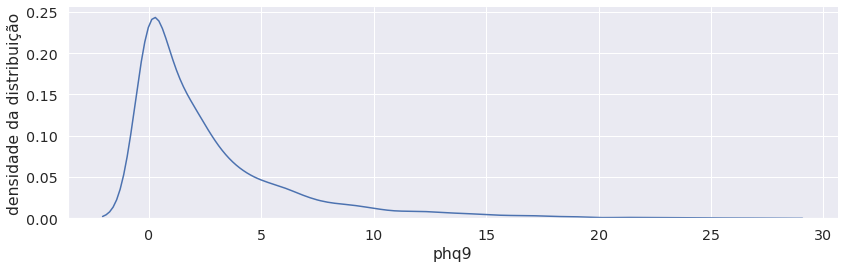

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1.3)

sns.displot(df['phq9'],
            height = 4,
            aspect = 3,
            kind = 'kde') #distribuição continua 
plt.ylabel('densidade da distribuição')
plt.show()

podemos ver que a maioria das pessoas tem um score proximo de 0 ou seja não possuem sintomas de depressão 


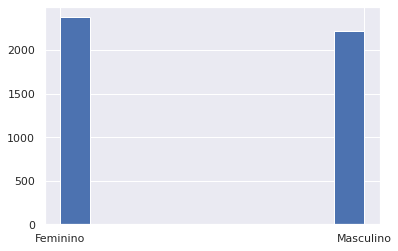

In [204]:
df['RIAGENDR'].hist()